In [1]:
# cnn genelikle nesne tanıma ve sınıflandırma problemlerinde kullanılır.

# 1. Kütüphane ve veri

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Veri seti Bilgi

    https://www.kaggle.com/c/cifar-10
    1. 80 milyon 32 X 32 renkli resim
    2. Bu resimler 10 farklı nesneye ait
    3. Bu nesneler:
        airplane 
        automobile 
        bird 
        cat 
        deer 
        dog 
        frog 
        horse 
        ship 
        truck

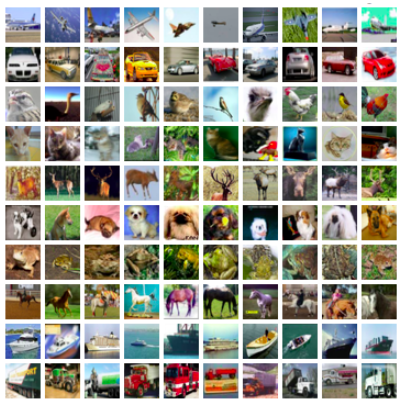

# 2. Veri Ön Hazırlığı

In [3]:
# Nesne isimlerini (hedef sınıfları) bir listede toplayalım
class_names = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog'
               'horse', 'ship', 'truck']

In [4]:
## 2.1. Veri setini yükleme
# Kütüphane verisi olduğu için X, y ayrımını load_data() metodu yapıyor.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
X_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


## 2.1. Normalizasyon

In [6]:
# 0-255 arası değer alan her bir pikseli 0-1 arasına çekiyoruz.

In [7]:
X_train = X_train / 255
X_test = X_test / 255

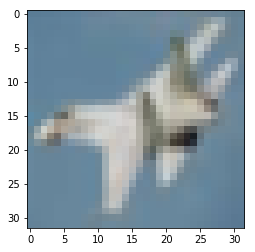

In [8]:
plt.imshow(X_test[10])
plt.show()

# 3. Evrişimli Sinir Ağını Örmek 
# (Building an Convolutional Neural Network - CNN
)

## 3.1. Model

In [9]:
# Fully connected ANN
model = tf.keras.models.Sequential()

## 3.2. İlk evrişim katmanını ekleme

In [10]:
# CNN Katman hiperparametreleri
# filtre sayısı: 32
# kernel size: 3 
     #  Yukarıdaki iki bilgi 3 x 3 boyutunda 32 adet filtre anlamına gelir
# padding: same
  # padding detaylı bilgi: https://www.corvil.com/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow
# aktivasyon fonksiyon türü: ReLU
# girdi katmanın şekli: (32, 32, 3)

In [11]:
model.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, padding='same',
                                activation='relu', input_shape =[32, 32, 3]))

## 3.3. İkinci evrişim katmanını ekleme

In [12]:
# CNN Katman hiperparametreleri
# filtre sayısı: 32
# kernel size: 3 
# padding: same
# aktivasyon fonksiyon türü: ReLU

In [14]:
model.add(tf.keras.layers.Conv2D( filters=32, kernel_size=3, padding='same',
                                activation='relu'))

## 3.4. İlk Ortaklama (POOL) katmanını ekleme

In [15]:
# Ortaklama (POOL) Katmanı hiperparametreleri
# pool_size: 2
# strides: 2 
# padding: valid

In [16]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

## 3.5. Üçüncü evrişim katmanını ekleme

In [17]:
# CNN Katman hiperparametreleri
# filtre sayısı: 64
# kernel size: 3 
# padding: same
# aktivasyon fonksiyon türü: ReLU

In [18]:
model.add(tf.keras.layers.Conv2D( filters=64, kernel_size=3, padding='same',
                                activation='relu'))

## 3.6. Dördüncü evrişim katmanını ekleme

In [19]:
model.add(tf.keras.layers.Conv2D( filters=64, kernel_size=3, padding='same',
                                activation='relu'))

## 3.7. İkinci Ortaklama (POOL) katmanını ekleme

In [20]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

## 3.8. Düzleştirme (Flattening) katmamını ekleme

In [21]:
model.add(tf.keras.layers.Flatten())

## 3.9. İlk tam bağlantılı (fully-connected) katmanı ekleme

In [22]:
# units/neurons: 128
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

## 3.10. Çıktı (output) katmanı ekleme

In [23]:
# units: hedef değişken sınıf sayısı
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

## 3.11. Ağı Derleme (Compiling the model)

In [25]:
# Optimizer ve loss seçilir
# adam: en iyi stochastic gradient descent kullanarak ağırlıkları günceller
# stochastic gradient descent optimize edicileri arasında en iyilerinden
# sparse_categorical_accuracy: 

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.3617 - sparse_categorical_accuracy: 0.5087
Epoch 2/5
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.9023 - sparse_categorical_accuracy: 0.6829
Epoch 3/5
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.7321 - sparse_categorical_accuracy: 0.7441
Epoch 4/5
50000/50000 [==============================] - 82s 2ms/sample - loss: 0.6086 - sparse_categorical_accuracy: 0.7872
Epoch 5/5
50000/50000 [==============================] - 82s 2ms/sample - loss: 0.5041 - sparse_categorical_accuracy: 0.8231


## 3.6. Modeli Değerlendirme

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 328us/sample - loss: 0.8098 - sparse_categorical_accuracy: 0.7409


In [29]:
print("test_loss", test_loss)
print("test_accuracy", test_accuracy)

test_loss 0.8098055969238281
test_accuracy 0.7409
